# Diamond Price Prediction Using Machine Learning

![](https://davidsonjewels.com/cdn/shop/articles/best-diamond-clarity-for-engagement-rings-941392.jpg?v=1680919523)


- Cut:	Describe the cut quality of the cubic zirconi...
- Color:	Colour of the cubic zirconia.With D being the...
- Clarity:	cubic zirconia Clarity refers to the absence ...
- Depth:	The Height of a cubic zirconia, measured from...
- Table:	The Width of the cubic zirconia's Table expre...
- Price:	the Price of the cubic zirconia.
- X:	Length of the cubic zirconia in mm.
- Y:	Width of the cubic zirconia in mm.
- Z:	Height of the cubic zirconia in mm.

In [247]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


#for creating model 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# metrics 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, confusion_matrix, f1_score, accuracy_score

# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [182]:
df = pd.read_csv('cubic_zirconia.csv')

In [130]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.shape

(26967, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [20]:
df.isnull().sum()   

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

we have 697 missing values

In [22]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### Feature Engineering
Feature engineering is essentially the process of using domain knowledge to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.

Feature engineering can be considered as applied machine learning itself. The features in your data will directly influence the predictive models you use and the results you can achieve. You can say that the better the features are, the better the result will be. Therefore, it is crucial to understand how to engineer the right features for your model.

<Axes: >

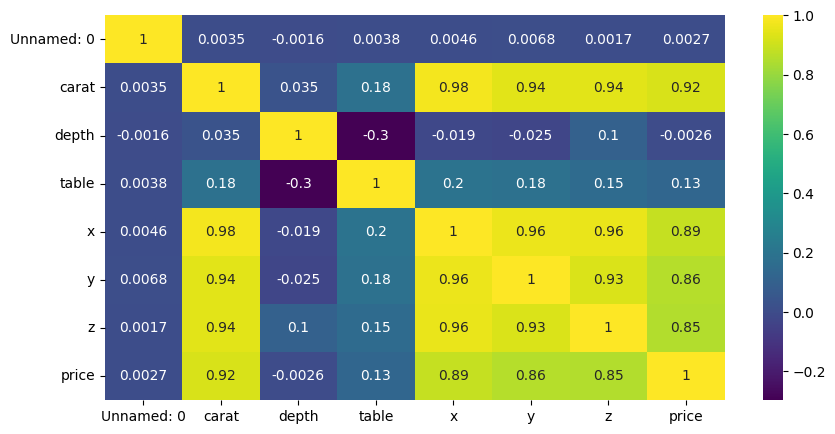

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')


In [126]:
def find_hig_correlation(data, threshold):
    df_corr = data.corr(numeric_only=True)

    col = data.columns[-1]
    high_corr = df_corr[col].sort_values(ascending=False) > threshold
    series_true = high_corr[high_corr == True]


    return list(series_true.index)


In [128]:
find_hig_correlation(df, 0.8)

['z', 'x', 'carat', 'y']

In [183]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [184]:
df.drop(['z', 'x', 'y'], axis=1, inplace=True)

### Feature Encoding
Converting categorical variables into numerical representations that can be understood by machine learning algorithms. This can involve techniques like one-hot encoding, label encoding, or ordinal encoding.

In [185]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


In [186]:
df.cut.value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [187]:
df.color.value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [188]:
df.clarity.value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [189]:
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
df.cut =df.cut.map(cut_map)

In [190]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df.color =df.color.map(color_map)

In [191]:
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
df.clarity =df.clarity.map(clarity_map)

In [192]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,2,3,62.1,58.0,499
1,0.33,4,4,8,60.8,58.0,984
2,0.90,3,2,6,62.2,60.0,6289
3,0.42,5,3,5,61.6,56.0,1082
4,0.31,5,3,7,60.4,59.0,779


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   price    26967 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.4 MB


#### Handling Missing Values:


In [194]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
price        0
dtype: int64

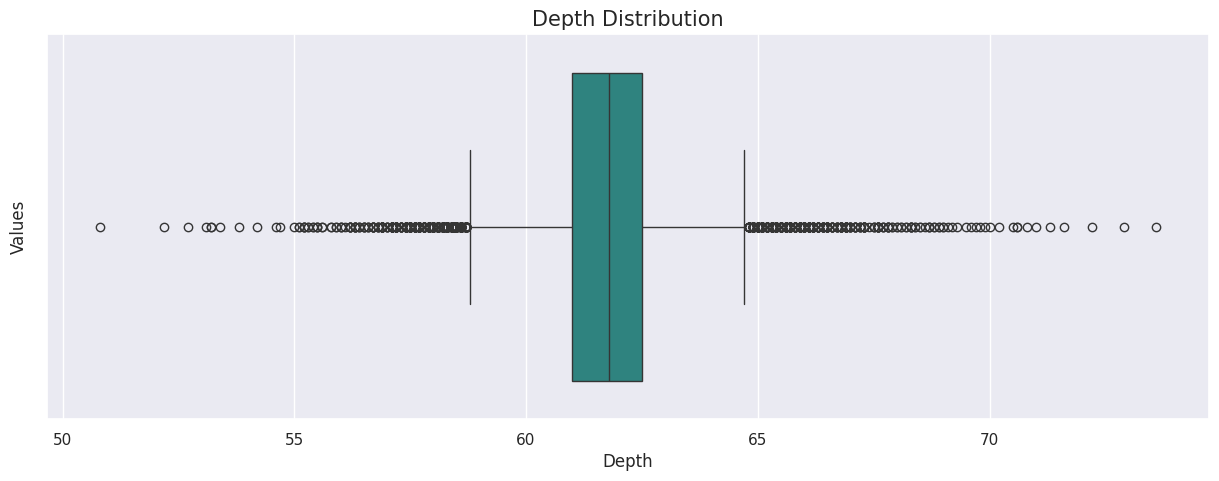

In [195]:
plt.figure(figsize=(15,5))
plt.ylabel('Values', fontsize=12)
plt.xlabel('Depth', fontsize=12)
plt.title('Depth Distribution', fontsize=15)


sns.boxplot(x =df.depth, color='lightblue', palette='viridis')
plt.show()

<Axes: xlabel='depth', ylabel='price'>

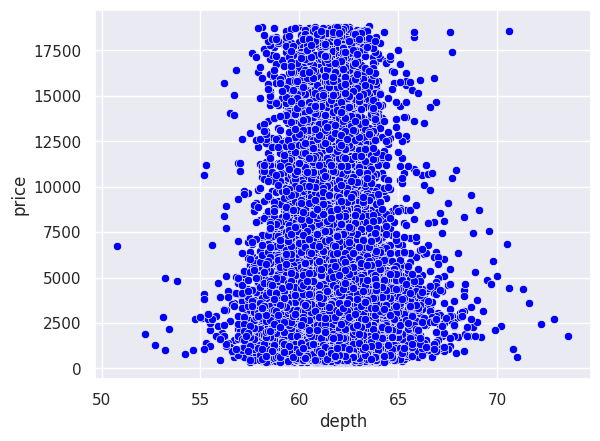

In [196]:
sns.scatterplot(x= df['depth'], y=df['price'], color='blue')

In [197]:
print('depth mena:', df['depth'].mean())
print('depth median:', df['depth'].median())

depth mena: 61.74514655500572
depth median: 61.8


In [198]:
df['depth'] = df['depth'].fillna(df['depth'].mean())

In [199]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

### Visualization

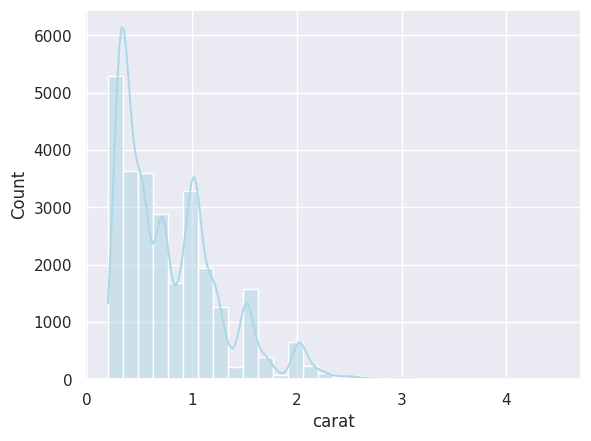

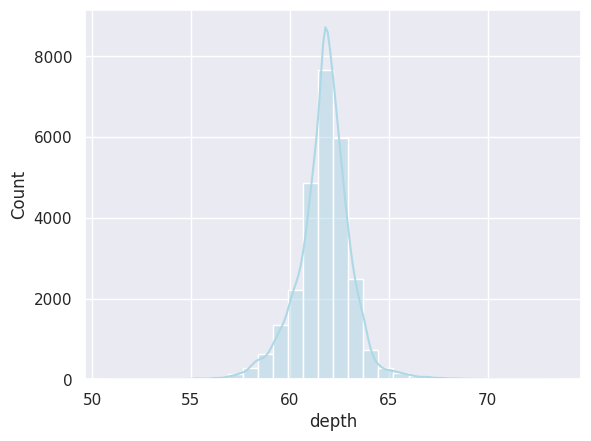

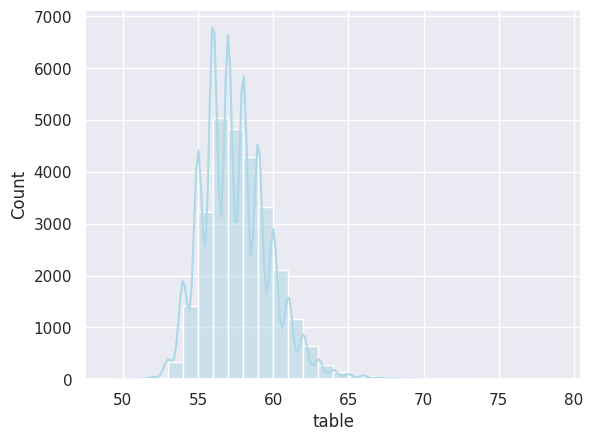

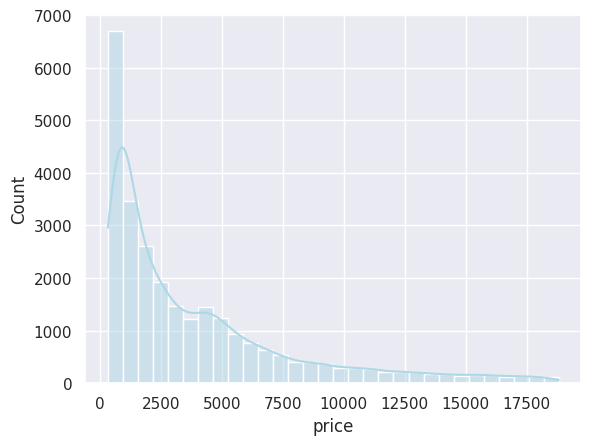

In [201]:
feature = ['carat', 'depth', 'table', 'price']
for i in feature:
    sns.histplot(df[i], kde=True, color='lightblue', bins=30)
    print("\n")
    plt.show()

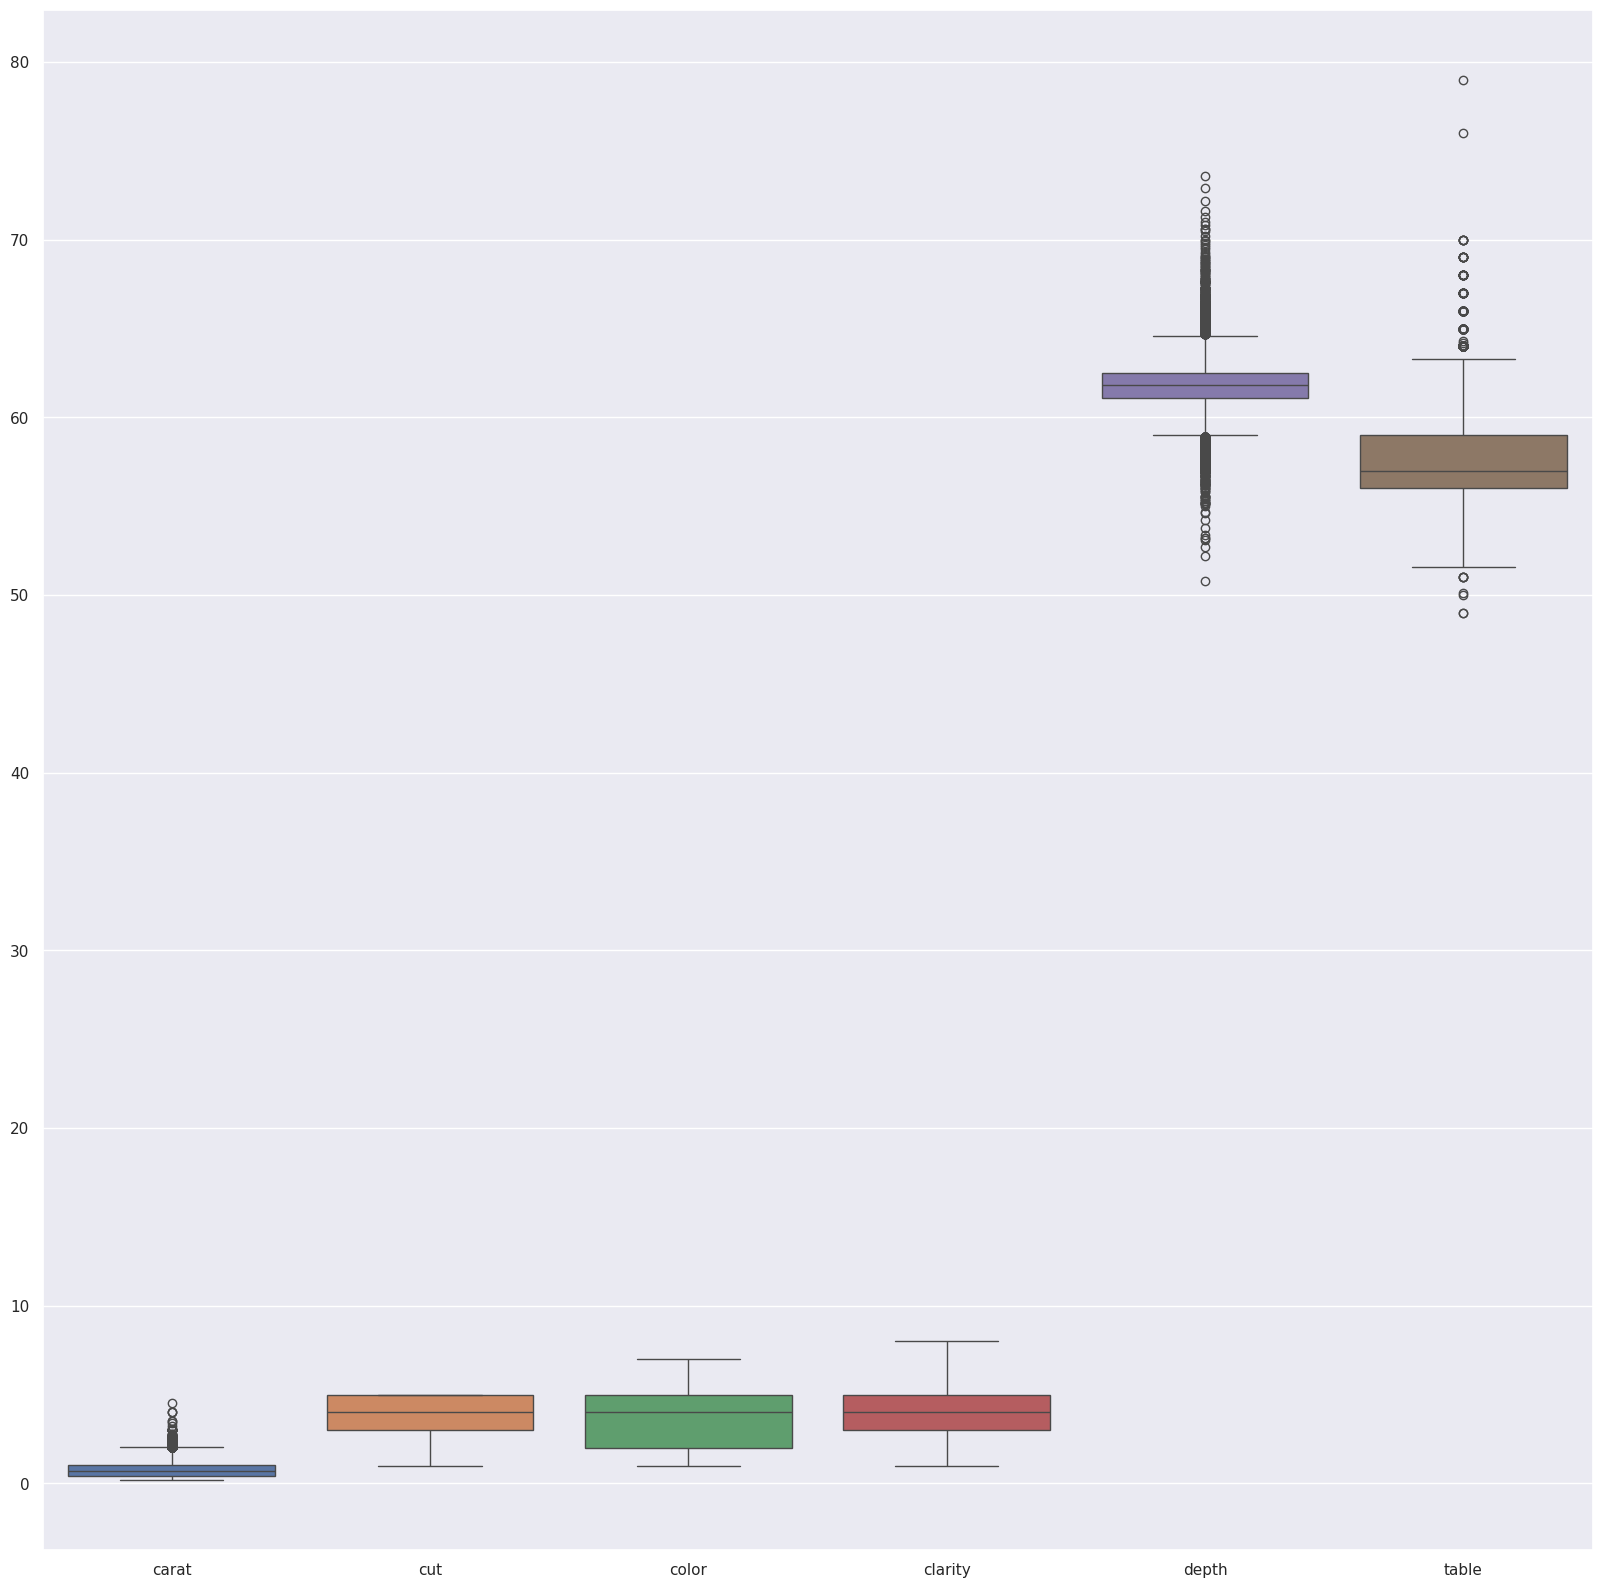

In [203]:
plt.figure(figsize=(20,20))
sns.boxplot(df.drop(['price'], axis=1))
plt.show()

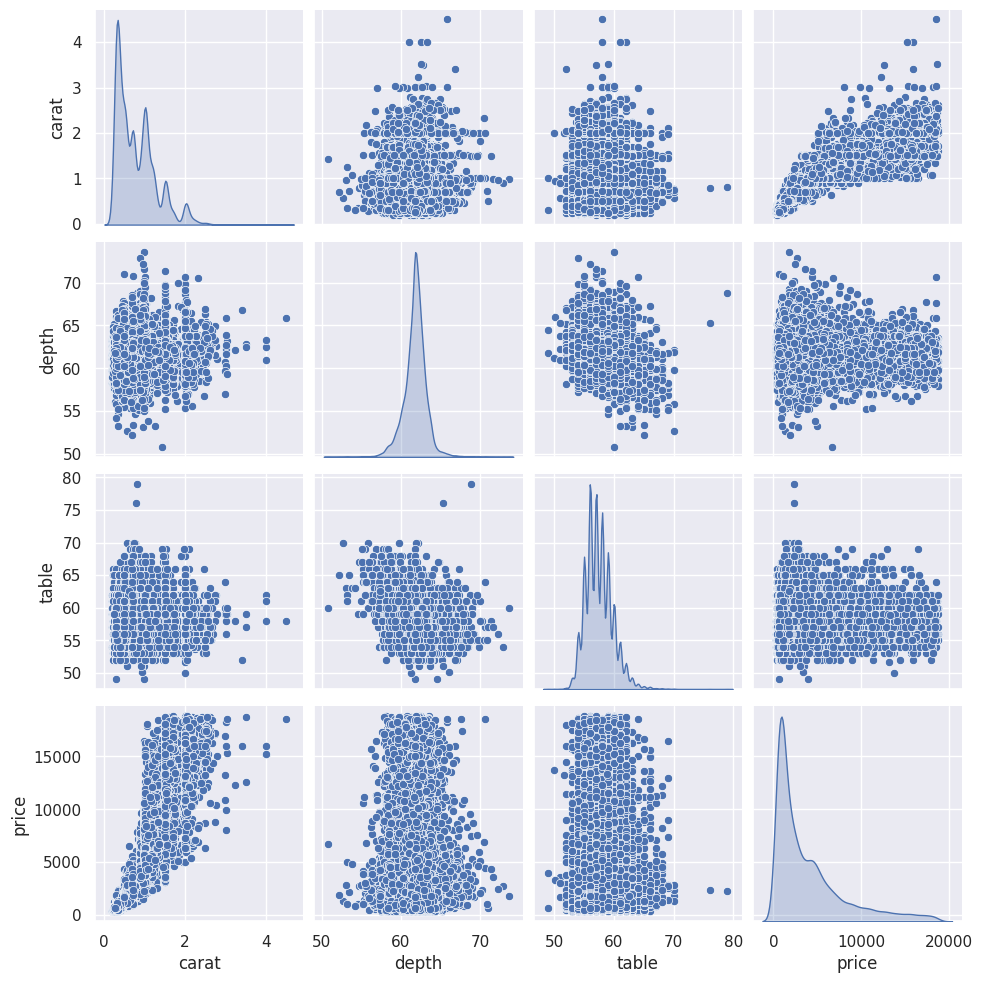

In [215]:
sns.pairplot(df[['carat', 'depth', 'table', 'price']], diag_kind='kde', kind='scatter', palette='viridis')

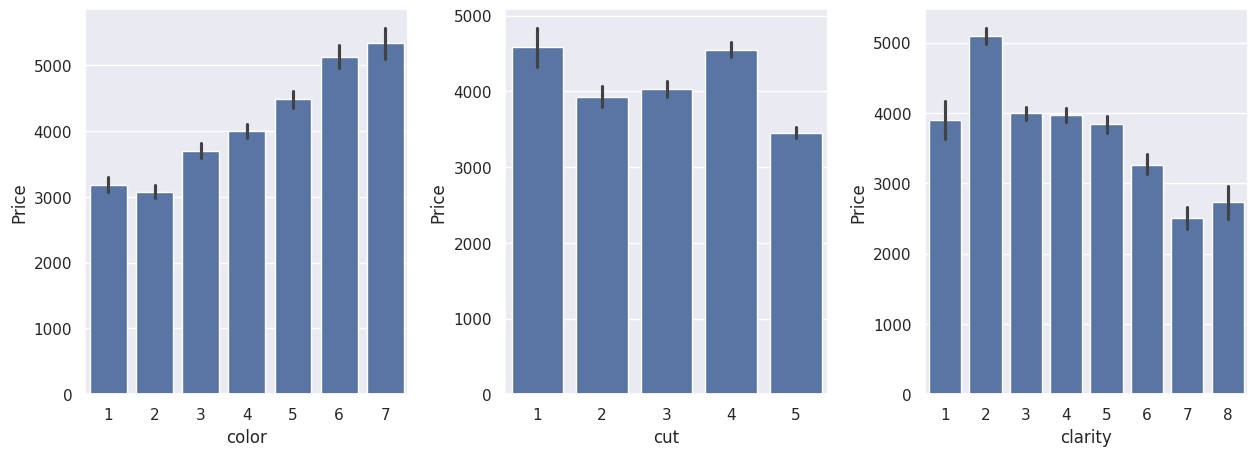

In [224]:
fig, ax= plt.subplots(1,3,figsize=(15,5)) 
ax = ax.flatten()


for i, feature in enumerate(['color', 'cut', 'clarity']):
    sns.barplot(x=feature, y='price', data=df, ax=ax[i])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Price')




plt.subplots_adjust(wspace=0.3)  
plt.show()

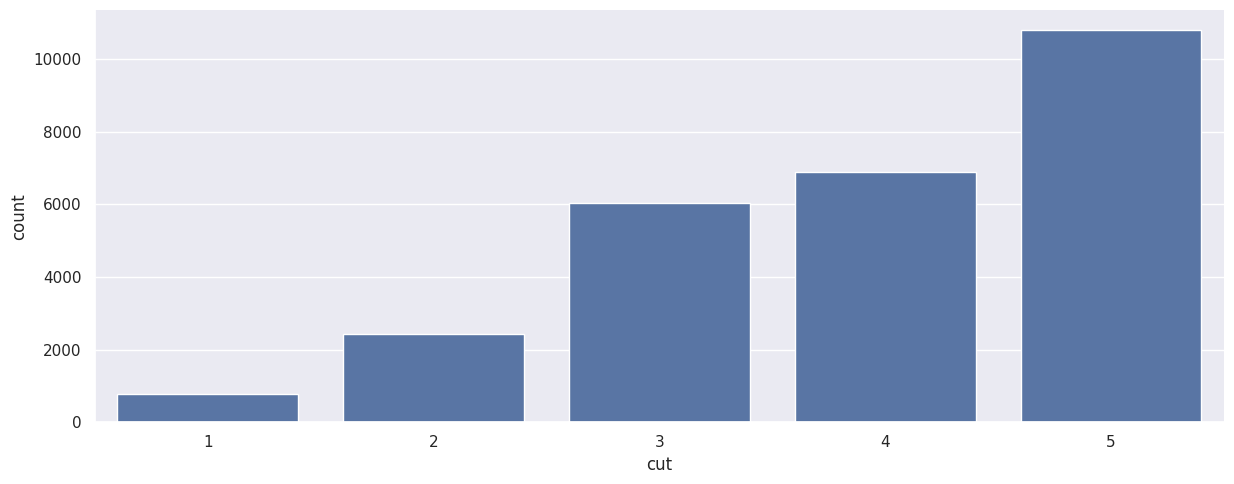

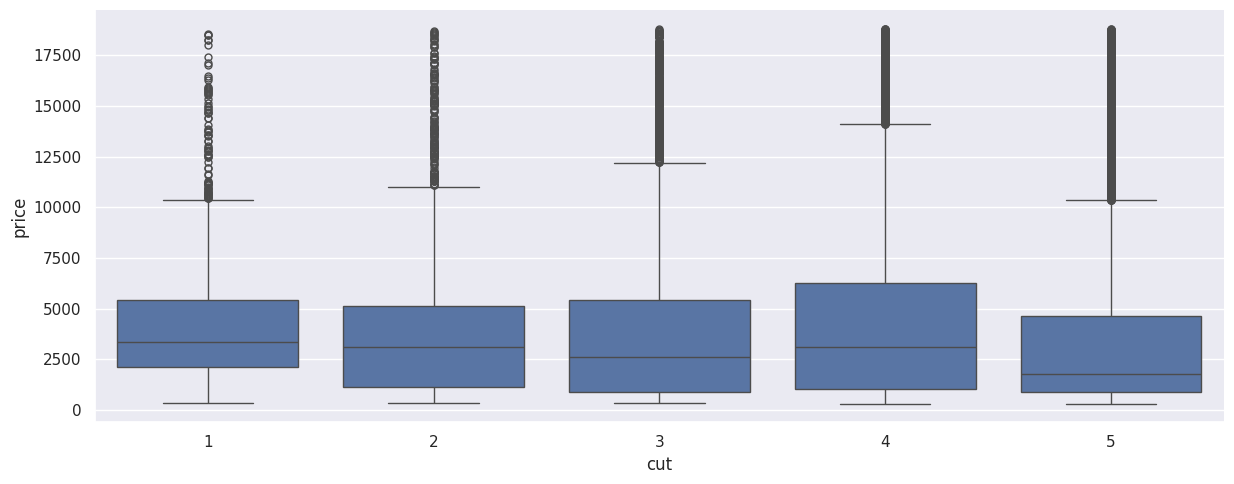

In [232]:
sns.catplot(x= "cut", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "cut", y = "price", kind = "box", data = df, aspect = 2.5)

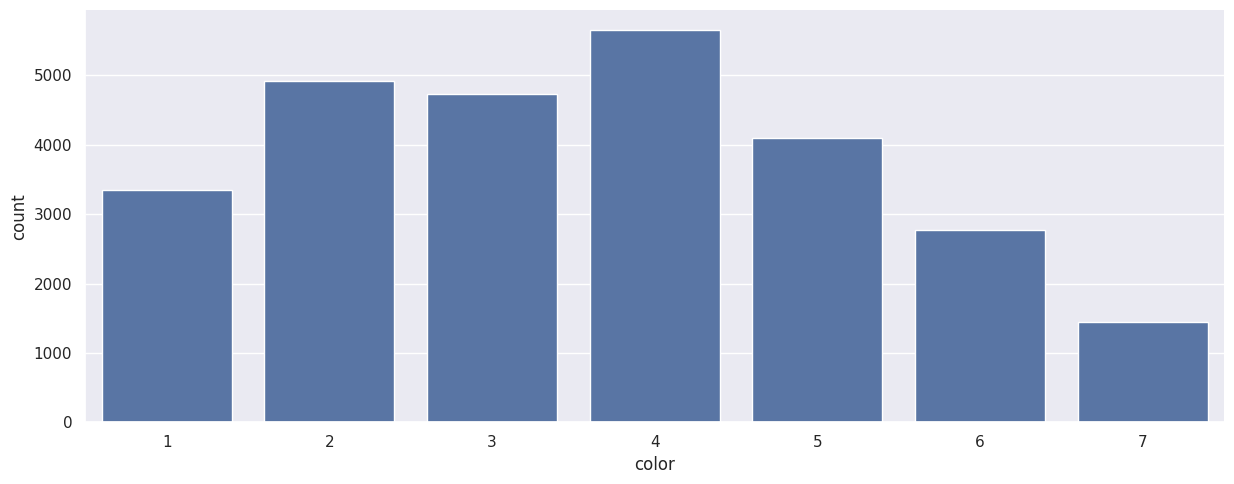

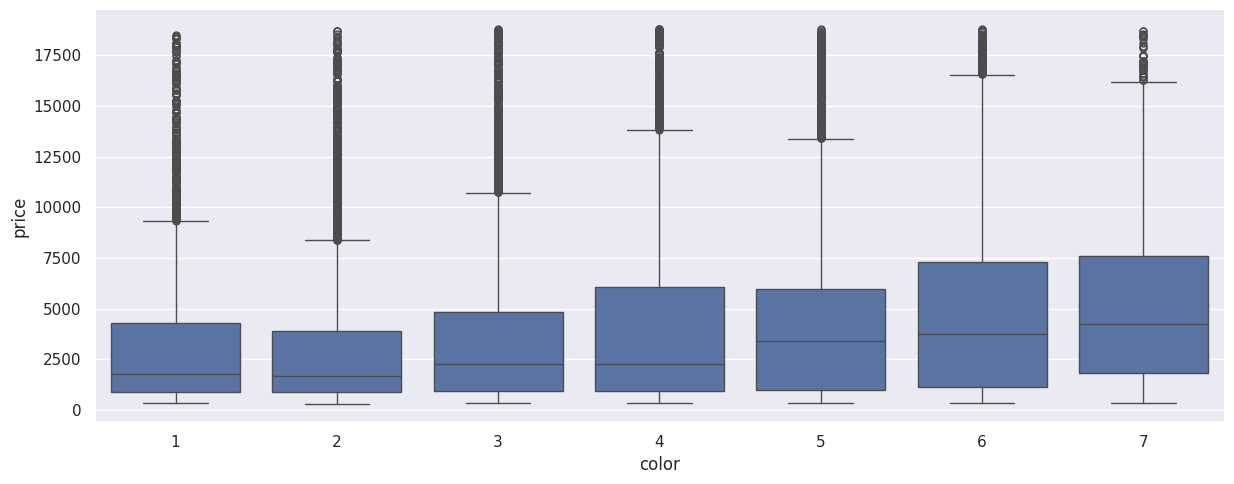

In [233]:
sns.catplot(x = "color", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "color", y = "price", kind = "box", data = df, aspect = 2.5)

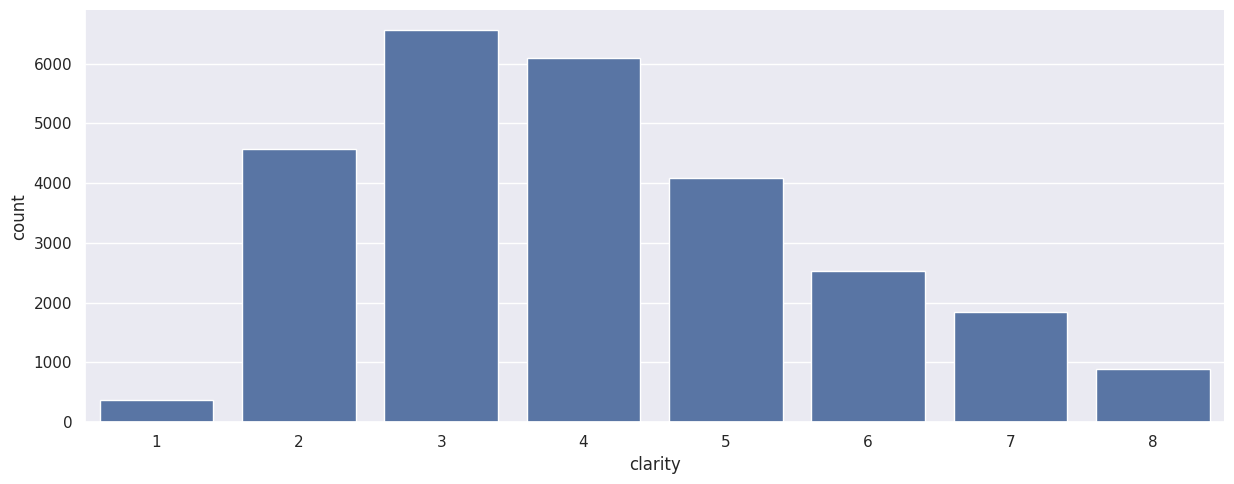

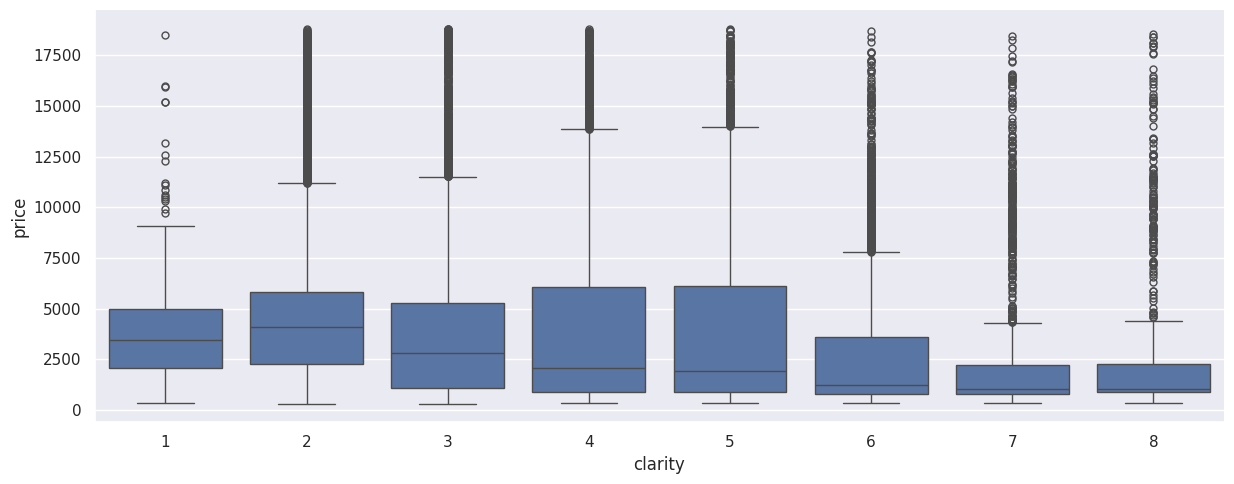

In [234]:
sns.catplot(x ="clarity", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "clarity", y = "price", kind = "box", data = df, aspect = 2.5)

### Model Selection 

In [235]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,2,3,62.1,58.0,499
1,0.33,4,4,8,60.8,58.0,984
2,0.90,3,2,6,62.2,60.0,6289
3,0.42,5,3,5,61.6,56.0,1082
4,0.31,5,3,7,60.4,59.0,779


In [264]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
   
    




    return mae, rmse, r2_square 

In [242]:
X = df.drop('price', axis=1)
y = df[['price']]

In [243]:
X.shape, y.shape

((26967, 6), (26967, 1))

In [244]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
x_train.shape, y_train.shape

((18876, 6), (18876, 1))

In [246]:
x_test.shape, y_test.shape

((8091, 6), (8091, 1))

In [254]:
x_train.values[0]

array([ 1.17,  2.  ,  1.  ,  2.  , 60.4 , 65.  ])

In [255]:
sclaer = MinMaxScaler(feature_range=(0,1))
x_train = sclaer.fit_transform(x_train)
x_test = sclaer.transform(x_test)

In [256]:
x_train[0]

array([0.2255814 , 0.25      , 0.        , 0.14285714, 0.42105263,
       0.53333333])

In [265]:
model_list = []
models={
    'Decision Tree' :DecisionTreeRegressor(),
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'KNN':KNeighborsRegressor(),
    'XBG':XGBRegressor(),
    'RandomForest':RandomForestRegressor(),
    'Adaboost':AdaBoostRegressor(),
    'Gradientboost':GradientBoostingRegressor()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_pred =model.predict(x_test)


    mae, rmse, r2_square = evaluate_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score for test",r2_square*100)
    print("R2 score for train", r2_score(y_train, model.predict(x_train))*100)
  

    
    print('='*35)
    print('\n')

Decision Tree
Model Training Performance
RMSE: 769.2823811031818
MAE: 393.30213611832073
R2 score for test 96.42468413783212
R2 score for train 99.987839285939


LinearRegression
Model Training Performance
RMSE: 1239.28780137667
MAE: 869.7478420260435
R2 score for test 90.72129871160195
R2 score for train 90.48215604129166


Lasso
Model Training Performance
RMSE: 1238.4986530228132
MAE: 866.5716243136262
R2 score for test 90.73311185220925
R2 score for train 90.47571829861852


Ridge
Model Training Performance
RMSE: 1239.1882779766543
MAE: 866.8292179018148
R2 score for test 90.72278893981091
R2 score for train 90.47933581221584


Elasticnet
Model Training Performance
RMSE: 3961.2757515644375
MAE: 2992.747443648748
R2 score for test 5.198983326678553
R2 score for train 5.0430662974756295


KNN
Model Training Performance
RMSE: 986.7071568143278
MAE: 531.0004943764677
R2 score for test 94.11807611253539
R2 score for train 96.07634201167912


XBG
Model Training Performance
RMSE: 574.80046